# Perceptron

We seek a direction vector $\mathbf{w}$ and separation threshold $b$ such that for sample $\mathbf{v}$

*   $\mathbf{w}^T \mathbf{v} < b \hspace{1cm} \Rightarrow \hspace{1cm} \mathbf{v} \in C_0$,
*   $\mathbf{w}^T \mathbf{v} > b \hspace{1cm} \Rightarrow \hspace{1cm} \mathbf{v} \in C_1$.

By extending the vectors $\mathbf{w}$ to $\hat{\mathbf{w}} = (-b, \mathbf{w})$ and $\mathbf{v}$ to $\hat{\mathbf{v}} = (1, \mathbf{v})$ this can be rephrased to

*   $\hat{\mathbf{w}}^T \hat{\mathbf{v}} = \mathbf{w}^T \mathbf{v} - b < 0 \hspace{1cm} \Rightarrow \hspace{1cm} \mathbf{v} \in C_0$,
*   $\hat{\mathbf{w}}^T \hat{\mathbf{v}} = \mathbf{w}^T \mathbf{v} - b > 0 \hspace{1cm} \Rightarrow \hspace{1cm} \mathbf{v} \in C_1$.

This way the bias $b$, becomes part of the vector of weights.

The step function is defined by
\begin{equation}
\displaystyle \textrm{sgn}(x) = \left\{ \begin{array}{rcl} -1 & \textrm{if} & x < 0 \\ 0 & \textrm{if} & x = 0 \\ 1 & \textrm{if} & x > 0 \end{array} \right.
\end{equation}
Then for sample $\mathbf{v}$


*   $\textrm{sgn}(\hat{\mathbf{w}}^T \hat{\mathbf{v}}) = -1 \hspace{1cm} \Rightarrow \hspace{1cm} \mathbf{v} \in C_0$,
*   $\textrm{sgn}(\hat{\mathbf{w}}^T \hat{\mathbf{v}}) = 1 \hspace{1.3cm} \Rightarrow \hspace{1cm} \mathbf{v} \in C_1$.

Specifically, the Perceptron initializes $\hat{\mathbf{w}}_0 = 0$, and updates the vector $\hat{\mathbf{w}}_{i-1}$ with each new training sample $\mathbf{v}_i$ by
\begin{equation}
\hat{\mathbf{w}}_i = \hat{\mathbf{w}}_{i-1} + \frac{\alpha}{2} \left( c_i - \textrm{sgn}(\hat{\mathbf{w}}_{i-1}^T \hat{\mathbf{v}}_i) \right) \hat{\mathbf{v}}_i,
\end{equation}
where $c_i$ is the class label of $\mathbf{v}_i$, that is $c_i = -1$ if $\mathbf{v}_i \in C_0$ and $c_i = 1$ if $\mathbf{v}_i \in C_1$. The parameter $0 < \alpha \leq 1$ is the learning rate}index and is set by the user. If the learning rate is chosen too big, any changes are too radical and oscillations occur. Note that $\hat{\mathbf{w}}_i$ is the same as $\hat{\mathbf{w}}_{i-1}$, if the class label was determined correctly. If the class label was determined incorrectly, the separation line is pulled in the direction such that it is more likely that the sample is labelled correctly in future. The sign of $c_i - \textrm{sgn}(\hat{\mathbf{w}}_{i-1}^T \hat{\mathbf{v}}_i)$ determines in which direction the separation line is pulled. At any stage, the vector of weights, $\hat{\mathbf{w}}_i$, is a linear combination of all samples which caused a change to the separation line so far.

Change the learning rate, stopping criterion and maximum number of epochs and observe the effects.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import Perceptron

In [2]:
m = datasets.load_iris()
# We consider two species.
# Iris setosa stored in the first 50 entries.
# Iris versicolor stored in the next 50 entries.

# Create a Perceptron instance.
p = Perceptron(random_state=1,  # For reproducibility.
               max_iter=100,    # Maximum number of epochs.
               eta0 = 0.1,        # Learning rate.
               shuffle = True,  # Random order of samples.
               fit_intercept = True, # Bias.
               tol=0.001)       # Stopping criterion.

# We consider sepal length and width, the first and second features.
# We train on the entire data.
p.fit(m.data[0:100, 0:2], m.target[0:100])

print('Number of epochs: ', p.n_iter_)
print('Weight vector: ', p.coef_)
print('Bias: ', p.intercept_)

Number of epochs:  12
Weight vector:  [[ 2.44 -4.32]]
Bias:  [-0.7]


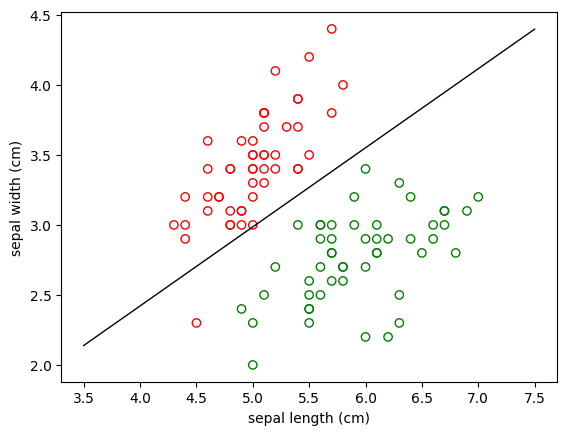

In [3]:
colours = np.repeat(['r'],50)
colours = np.append(colours, np.repeat(['g'],50))
colours = np.append(colours, np.repeat(['b'],50))
fig, ax = plt.subplots()
# Plot data.
scatter = ax.scatter(m.data[0:100, 0], m.data[0:100, 1],
                     facecolors = 'none',
                     edgecolors = colours[0:100])
ax.set(xlabel=m.feature_names[0], ylabel=m.feature_names[1])

# Plot separation line.
xstart = 3.5
temp1 = [xstart, (p.intercept_ - p.coef_[0][0] * xstart) / p.coef_[0][1]]
xend = 7.5
temp2 = [xend, (p.intercept_ - p.coef_[0][0] * xend) / p.coef_[0][1]]
plt.plot([temp1[0], temp2[0]], [temp1[1], temp2[1]],
         c = 'k', linewidth =1)
plt.show()